<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Testing_Pytrodes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [347]:
import scipy as sci
import os
from matplotlib import pyplot as plt
import numpy as np

In [372]:

mat_data = sci.io.loadmat(os.path.join(zl_dir, 'ZL04_46_LFP_downsamp01_17.mat'))
mat_data.keys()
downsamp_MATLAB = mat_data['Raw_LFP'].flatten()    # [0][0][-1][0][0][4].flatten()
downsamp_MATLAB


print(len(downsamp_MATLAB))
print(len(pyramidal_downsampled))

18191004
18192760


In [371]:
len(raw_pyramidal_lfp)

109156560

In [361]:
zl_dir = "C:\\Users\\dennis.tabuena\\Desktop\\ZL04_46_ch17_ref2"

mat_data = sci.io.loadmat(os.path.join(zl_dir, 'ZL04_46_LFP_unsubtracted01_17_ripfilt.mat'))
ripple_trace_MATLAB = mat_data['ZL04_46_LFP_unsubtracted01_17_ripfilt'].flatten()
print(len(ripple_trace_MATLAB))
print(len(pyramidal_ripfilt))

18191004
18192760


In [349]:
"""Down Sampling"""
raw_fs = 30000
desired_fs = 5000
downsample_factor = int(raw_fs/desired_fs)


pyramidal_downsampled = sci.signal.decimate(raw_pyramidal_lfp,downsample_factor)
fs = raw_fs/downsample_factor
print(f'fs: {fs}')
time_trace = np.arange(len(pyramidal_downsampled))/fs



fs: 5000.0


In [350]:
"""Ripple Filtering"""
h_filt = sci.signal.firwin(1266, [150,250], width=10, window='hamming', pass_zero='bandpass', scale=True, fs=5000)
# plt.plot(h_filt)
pyramidal_ripfilt = sci.signal.filtfilt(h_filt,1,pyramidal_downsampled,axis=0)

In [351]:
hilbert_signal.shape

(18192760,)

In [352]:
""" Hilbert & Smooth """
hilbert_signal = sci.signal.hilbert(pyramidal_ripfilt )
pyramidal_envelope = np.abs(hilbert_signal)
pyramidal_inst_phase = np.unwrap(np.angle(hilbert_signal))
pyramidal_inst_frequency = (np.diff(hilbert_signal) /(2.0*np.pi) * fs)


gauss_width_ms = 4
sigma = gauss_width_ms/1000*fs
filter_width_sigmas = 8
pyramidal_smoothed  = sci.ndimage.gaussian_filter1d(pyramidal_envelope, sigma, axis=0, mode='reflect', truncate=filter_width_sigmas)

In [353]:
""" Z-score """
def z_with_params(x,mean,std):
    return (x-mean)/std

full_trace_std = np.std(pyramidal_smoothed)
full_trace_mean = np.mean(pyramidal_smoothed)
pyramidal_ripp_z = z_with_params(pyramidal_smoothed,full_trace_mean,full_trace_std)

In [354]:
print(pyramidal_ripp_z.shape)

(18192760,)


In [355]:
""" Find Ripps """
over_absolute_min_thresh = pyramidal_ripp_z>3
starts = np.where(np.diff(over_absolute_min_thresh,prepend=0)==1)[0]
print(len(starts))

3479


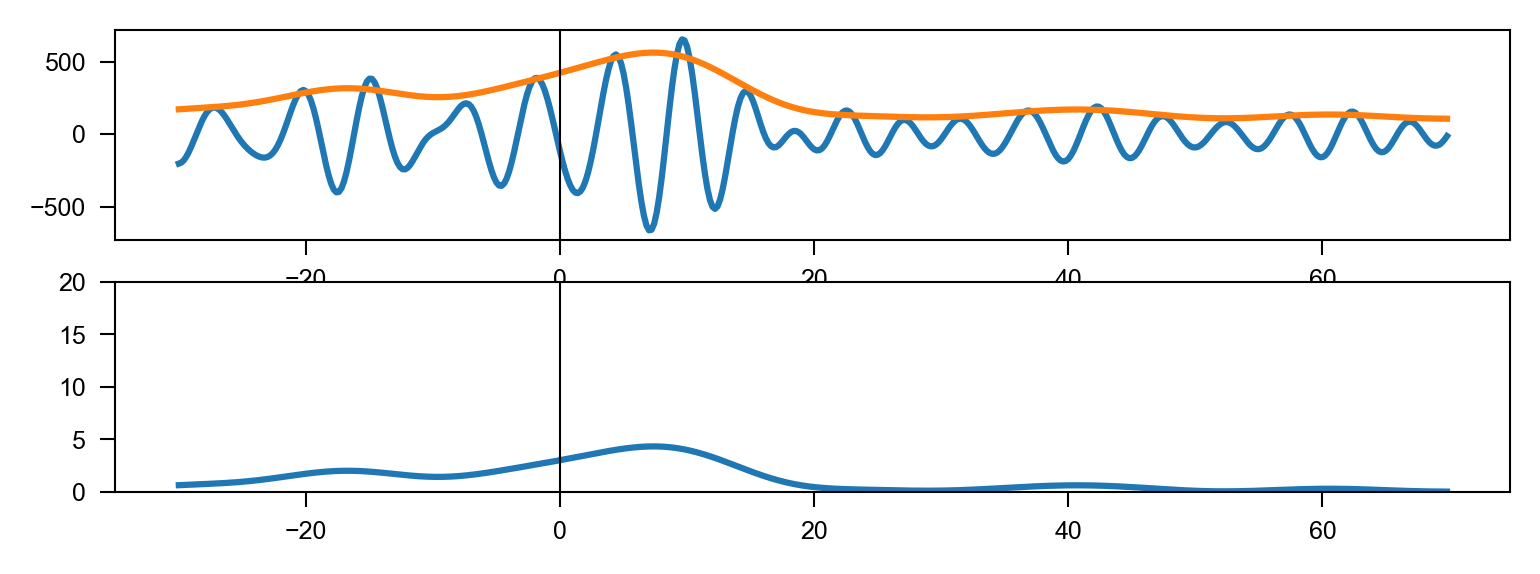

In [356]:
display_window_ms = [-30,70]
display_windo_indx = np.arange(display_window_ms[0]*fs/1000,display_window_ms[1]*fs/1000)
window_time_ms = display_windo_indx/fs*1000
random_start = np.random.choice(starts)

fig,ax=plt.subplots(2,1,figsize=(6,2))
chosen_indicies = random_start+display_windo_indx
chosen_rip = pyramidal_ripfilt[  chosen_indicies.astype(int)  ]
ax[0].plot(window_time_ms,   pyramidal_ripfilt[  chosen_indicies.astype(int)  ]  )
ax[0].plot(window_time_ms,   pyramidal_smoothed[  chosen_indicies.astype(int)  ]  )
ax[0].axvline(0,color='k',linewidth=.5)
ax[1].plot(window_time_ms,   pyramidal_ripp_z[  chosen_indicies.astype(int)  ]  )
ax[1].set_ylim([0,20])
ax[1].axvline(0,color='k',linewidth=.5)

18191004
18192760


In [358]:
delta_len =  - len(pyramidal_ripfilt)
delta_len/fs




-0.3512

In [ ]:

mat_data = sci.io.loadmat(os.path.join(zl_dir, 'ZL04_46_LFP_unsubtracted01_17_ripfilt.mat'))
ripple_trace_MATLAB = mat_data['ZL04_46_LFP_unsubtracted01_17_ripfilt'].flatten()

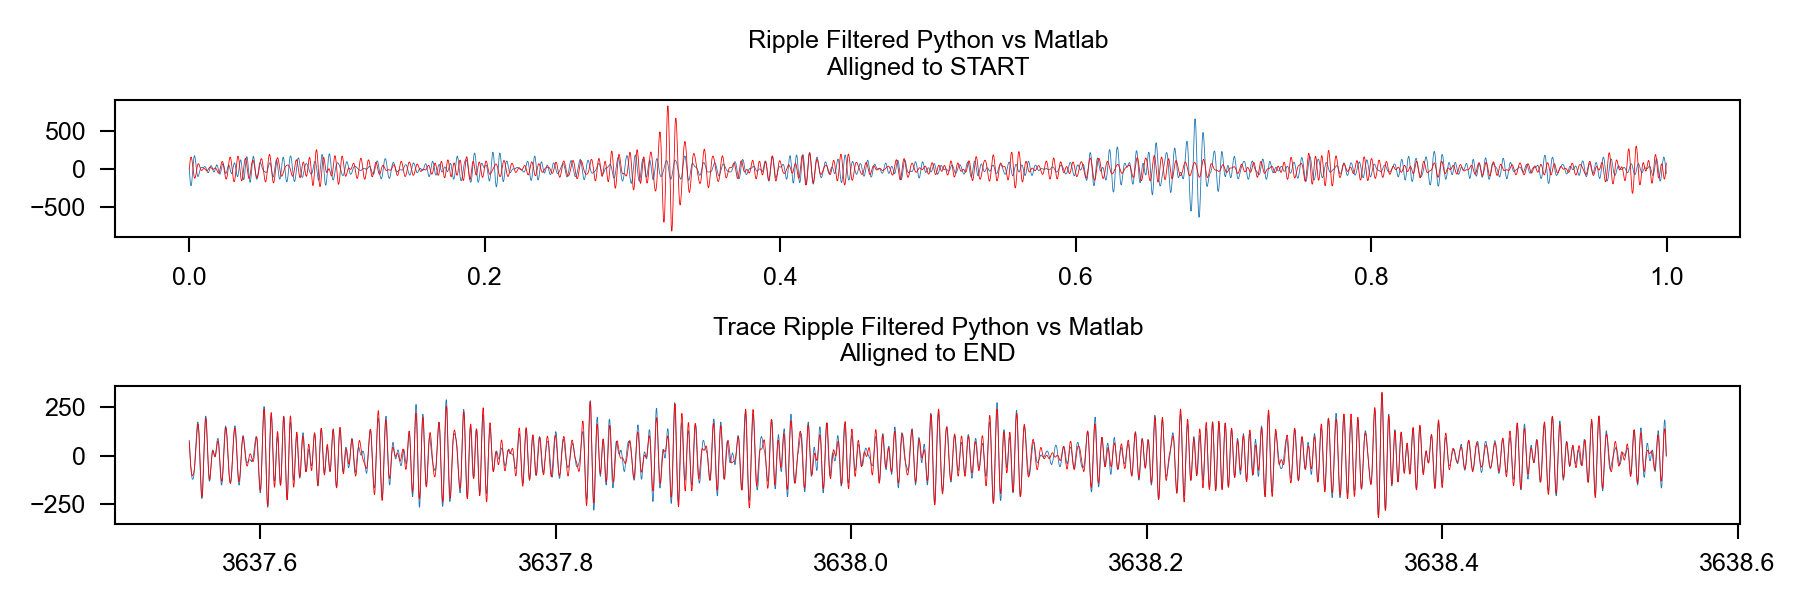

In [400]:
fig,ax=plt.subplots(2,1,figsize=(6,2))
show_wind = np.arange(1*fs).astype(int)

ending_mat = len(ripple_trace_MATLAB)-show_wind-1
ending_py = len(pyramidal_ripfilt)-show_wind-1

ax[0].plot(time_trace[show_wind], ripple_trace_MATLAB[show_wind]*5,linewidth=.2)
ax[0].plot(time_trace[show_wind], pyramidal_ripfilt[show_wind],linewidth=.2,color='r')
ax[0].set_title('Ripple Filtered Python vs Matlab\nAlligned to START')

ax[1].plot(time_trace[ending_py], ripple_trace_MATLAB[ending_mat]*5,linewidth=.2)
ax[1].plot(time_trace[ending_py], pyramidal_ripfilt[ending_py],linewidth=.2,color='r')
ax[1].set_title('Trace Ripple Filtered Python vs Matlab\nAlligned to END')

plt.tight_layout()
plt.show()
# ax[0].set_title('Matlab DownSampled')
# ax[0].set_title('Python DownSampled')